In [1]:
import cv2 as cv
from matplotlib import pyplot as plt
from skimage import measure, metrics
from skimage.metrics import structural_similarity as ssim
import numpy as np

In [2]:
orig_image = cv.imread('images/penguin.png')

In [3]:
def gaussian_filter(image: np.ndarray, kernel_size: tuple) -> np.ndarray:

    '''
    generates an denoised image using a mean filter kernel

    Parameters:
        image (np.ndarray): a variable that references an image in np.ndarray encoding
        kernel_size (tuple): a tuple that indicates kernel size (shape)
    
    Returns:
        image(np.ndarray) 
    '''
    
    gaussian_kernel = np.ones(kernel_size, np.float32)/np.prod(kernel_size)
    conv_gaussian = cv.filter2D(image, -1, gaussian_kernel, borderType = cv.BORDER_CONSTANT)
    return conv_gaussian

In [4]:
def plot_images(images: list, titles: list, columns: int, font_size: int, allow_axes: bool) -> np.ndarray:

    """
    generates a plot of images for comparison, dynamic calculation of arrangement

    Parameters: 
        images (list): list of variables referencing an image
        titles (list): list of strings describing the image
        columns: (integer): number of columns for plot
        font_size (integer): fontsize of subplot titles
        allow_axes (boolean): if true, adds axes by default. else, removes axes

    Returns:
        matrix of pixel values for each image (np.array)
        a plot (image)
    """
    images_len = len(images)
    rows = images_len // columns

    fig, axes = plt.subplots(rows, columns, figsize = (18, 6 * rows))
    axes = axes.flatten()
    
    for i in range(images_len):
        axes[i].imshow(images[i])
        axes[i].set_title(titles[i], fontsize=font_size)
        print(np.array(images[i]))
        if allow_axes == True:
            pass
        else:
            axes[i].axis('off')
    plt.show()


In [5]:
def evaluate(image_type: np.ndarray, convolution: np.float64) -> dict:
    
    '''
    generates a report of filter performance

    Parameters:

        image_type (np.ndarray): baseline image
        convolution (np.float64): image to compare

    Returns: 
        (dict)
        RSME (np.float64): square root of the mean of squared differences of pixel values (low == similarity)
        MSE (np.float64): mean of squared differences of pixel values (returns number of 'error' pixels)
        PSNR (np.float64): peak signal to noise ratio, ideally greater than 30 db (10log10 (255^2/MSE))
        SSIM  (np.float64): structural similarity of the image (-1 to 1)
    
    '''
    if image_type.shape != convolution.shape:
        raise ValueError('Image shapes do not match')


    rmse_skimg = metrics.normalized_root_mse(image_type, convolution)
    mse_skimg = metrics.mean_squared_error(image_type, convolution)
    psnr_skimg = metrics.peak_signal_noise_ratio(image_type, convolution)
    ssim_skimg = ssim(image_type, convolution, data_range = image_type.max() - image_type.min(), multichannel = True)
    return {
        'RMSE: ' : rmse_skimg,
        'MSE: ' : mse_skimg,
        'PSNR: ' : psnr_skimg,
        'SSIM: ' : ssim_skimg,
    }

In [6]:
blur = cv.blur(orig_image,(5,5),0)
gaussian = gaussian_filter(blur, (3,3))


[[[86 53 62]
  [86 53 62]
  [86 53 62]
  ...
  [86 53 62]
  [86 53 62]
  [86 53 62]]

 [[86 53 62]
  [86 53 62]
  [86 53 62]
  ...
  [86 53 62]
  [86 53 62]
  [86 53 62]]

 [[86 53 62]
  [86 53 62]
  [86 53 62]
  ...
  [86 53 62]
  [86 53 62]
  [86 53 62]]

 ...

 [[86 53 62]
  [86 53 62]
  [86 53 62]
  ...
  [86 53 62]
  [86 53 62]
  [86 53 62]]

 [[86 53 62]
  [86 53 62]
  [86 53 62]
  ...
  [86 53 62]
  [86 53 62]
  [86 53 62]]

 [[86 53 62]
  [86 53 62]
  [86 53 62]
  ...
  [86 53 62]
  [86 53 62]
  [86 53 62]]]
[[[86 53 62]
  [86 53 62]
  [86 53 62]
  ...
  [86 53 62]
  [86 53 62]
  [86 53 62]]

 [[86 53 62]
  [86 53 62]
  [86 53 62]
  ...
  [86 53 62]
  [86 53 62]
  [86 53 62]]

 [[86 53 62]
  [86 53 62]
  [86 53 62]
  ...
  [86 53 62]
  [86 53 62]
  [86 53 62]]

 ...

 [[86 53 62]
  [86 53 62]
  [86 53 62]
  ...
  [86 53 62]
  [86 53 62]
  [86 53 62]]

 [[86 53 62]
  [86 53 62]
  [86 53 62]
  ...
  [86 53 62]
  [86 53 62]
  [86 53 62]]

 [[86 53 62]
  [86 53 62]
  [86 53 62]
  .

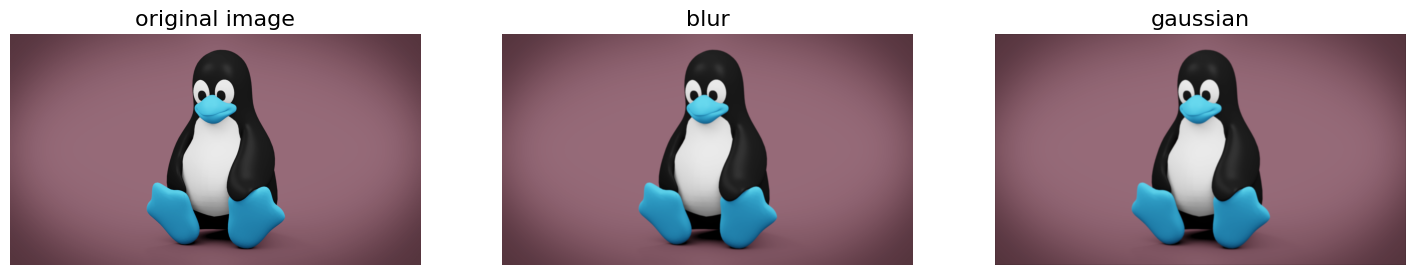

In [7]:
images = [orig_image, blur, gaussian]
titles = ['original image', 'blur', 'gaussian']
plot_images(images, titles, 3, 16, False)

In [9]:
evaluate(orig_image, gaussian)

ValueError: win_size exceeds image extent. Either ensure that your images are at least 7x7; or pass win_size explicitly in the function call, with an odd value less than or equal to the smaller side of your images. If your images are multichannel (with color channels), set channel_axis to the axis number corresponding to the channels.